# 19. 흐린 사진을 선명하게

## 19-1. 들어가며

* Super Resolution
    - 저해상도의 이미지를 고해상도 이미지로 변환
    - 이미지 생성형 기술이 효과적으로 사용되는 사례
    - GAN 관련 기술이 일반적인 CNN 기술보다 훨씬 정밀한 고해상도 이미지를 생성해 내는데 효과적임
    - 고화질의 이미지를 생성해 내는 GAN 모델을 학습하는 것은 오랜 시간이 소요됨
    - 이번 프로젝트는 모델학습 과정 자체보다는 모델의 구조와 특성, 그리고 잘 학습된 모델을 활용한 고해상도 변환을 체험하는 데 보다 중점을 두어 진행

### 데이터 셋 다운로드

- tensorflow-datasets 라이브러리가 설치
- $ pip install tensorflow-datasets

In [ ]:
# 데이터 용량 약 4GB
# 수십분 정도 소요됨

import tensorflow_datasets as tfds
tfds.load("div2k/bicubic_x4")

EXTRACTING {'train_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip', 'valid_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X4.zip', 'train_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip', 'valid_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip'}


## 19-5. 가장 쉬운 Super Resolution

    * Super Resolution을 수행하는 가장 쉬운 방식은 Interpolation 을 이용하는 것
    * 참고 자료: 선형보간법과 삼차보간법, 제대로 이해하자
    * https://bskyvision.com/789
    * 참고 자료: Bilinear interpolation 예제
    * http://blog.naver.com/dic1224/220882679460
    
    * 이번에는 opencv 라이브러리를 이용해 interpolation을 적용해 봅시다. 
    * 적용할 이미지는 scikit-image에서 제공하는 예제 이미지를 사용
    * pip install opencv-python
    * pip install scikit-image

(300, 451, 3)


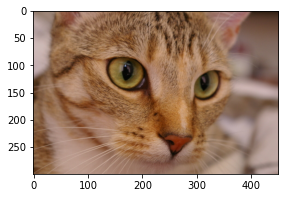

In [3]:
from skimage import data
import matplotlib.pyplot as plt

hr_image = data.chelsea() # skimage에서 제공하는 예제 이미지를 불러옵니다.
hr_shape = hr_image.shape[:2]

print(hr_image.shape) # 이미지의 크기를 출력합니다.

plt.figure(figsize=(6,3))
plt.imshow(hr_image)

* 위 사진을 크기를 줄여 저해상도로 낮출 컷임
* 이미지를 100*150*3으로 줄임
* opencv 라이브러리의 resize()를 이용해 이미지의 크기를 조절

(100, 150, 3)


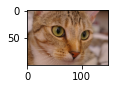

In [4]:
import cv2
lr_image = cv2.resize(hr_image, dsize=(150,100)) # (가로 픽셀 수, 세로 픽셀 수)

print(lr_image.shape)

plt.figure(figsize=(3,1))
plt.imshow(lr_image)

* 작아진 고양이 이미지로 Interpolation 방법을 적용해 Super Resolution을 시도
* resize()내의 interpolation 설정에 따라 적용 방법을 조절할 수 있음
* 아래 코드는 이전에 간략하게 알아보았던 bilinear 및 bicubic interpolation을 적용해 이미지를 '400 x 600 x 3' 크기로 크게 변환하는 예제

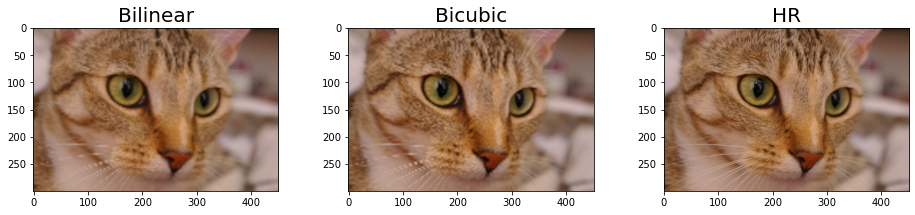

In [5]:
bilinear_image = cv2.resize(
    lr_image, 
    dsize=(451, 300), # (가로 픽셀 수, 세로 픽셀 수) 
    interpolation=cv2.INTER_LINEAR # bilinear interpolation 적용
)

bicubic_image = cv2.resize(
    lr_image, 
    dsize=(451, 300), # (가로 픽셀 수, 세로 픽셀 수)
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

images = [bilinear_image, bicubic_image, hr_image]
titles = ["Bilinear", "Bicubic", "HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(image)
    plt.title(title, fontsize=20)

* 이외 다른 interpolation 방법을 적용하고 싶다면 아래 링크를 참고해 주세요.
* 참고 자료: OpenCV Documentation 
* https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

* Bilinear 및 bicubic interpolation을 적용한 이미지와 원래 고해상도 이미지(위 그림의 HR)를 시각화 했습니다. 
* 이미지가 작아 시각적으로 해상도에 큰 차이가 없어보입니다. 
* 아래 코드를 이용해 특정 부분을 잘라내어 시각화 해봅시다.

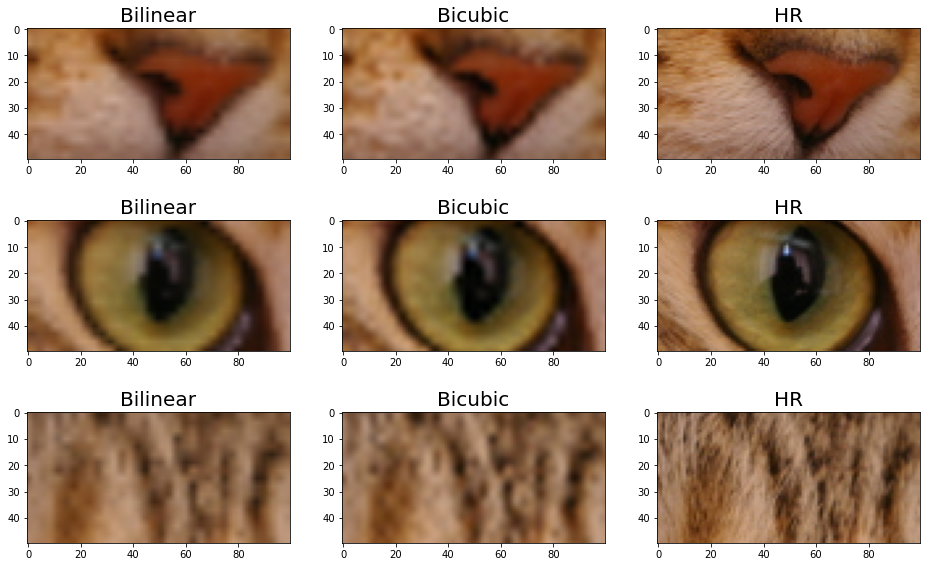

In [6]:
# 특정 영역을 잘라낼 함수를 정의합니다.
def crop(image, left_top, x=50, y=100):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]


# 잘라낼 영역의 좌표를 정의합니다.
left_tops = [(220,200)] *3 + [(90,120)] *3 + [(30,200)] *3

plt.figure(figsize=(16,10))
for i, (image, left_top, title) in enumerate(zip(images*3, left_tops, titles*3)):
    plt.subplot(3,3,i+1)
    plt.imshow(crop(image, left_top))
    plt.title(title, fontsize=20)

* 결론
    * Interpolation 방법을 이용한 Super Resolution 결과는 이미지만 크게 만들어줄 뿐 세밀한 정보는 거의 찾아볼 수 없음
    * 위와 같은 interpolation 방법은 많은 딥러닝 기반 Super Resolution 연구에서 결과를 비교 하기 위해 수행됨
    * 방금 수행한 interpolation 방법과 비교하여 딥러닝을 사용하는 것이 얼마나 성능이 좋은지 뒤에서 확인해 볼것

## 19-8. SRCNN을 이용해 Super Resolution 도전하기

    * 19-1에서 다운로드한 데이터 셋 필요
    * tensorflow-datasets 라이브러리에서 우리가 사용해 볼 데이터셋은 DIV2K
    * DIV2K 데이터셋은 많은 Super Resolution 연구에서 학습 및 평가에 사용되는 데이터 셋
    * 800개의 학습용 데이터셋 및 100개의 검증용 데이터셋으로 구성
    * 앞서 다운로드 한 데이터셋은 div2k/bicubic_x4 이며, 
    * 이는 DIV2K 데이터 셋 중에서 실제 고해상도 이미지를 대상으로 bicubic interpolation을 이용해 가로 및 세로 픽셀 수를 1/4배로 줄인 데이터 셋
    * 이렇게 만들어진 저해상도 이미지와 원래 고해상도 이미지가 서로 한 쌍으로 구성
    * 참고 자료: DIV2K datasets
    https://data.vision.ee.ethz.ch/cvl/DIV2K/

### 데이터 준비하기

    * DIV2K 데이터셋을 불러오기
    * 아래 코드에서 생성한 train과 valid는 각각 저해상도 및 고해상도 이미지를 쌍으로 담고 있습니다. 
    * 그 중 한 쌍의 이미지에 대해 시각화해봅시다. 
    * 저해상도 이미지를 bicubic interpolation하여 고해상도 이미지와 동일한 크기로 만들었습니다.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# 데이터를 불러옵니다.
train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train","validation"],
    as_supervised=True
)

# 시각화를 위해 한 개의 데이터만 선택합니다.
for i, (lr, hr) in enumerate(valid):
    if i == 6: break
    
# 저해상도 이미지를 고해상도 이미지 크기로 bicubic interpolation 합니다.  
hr, lr = np.array(hr), np.array(lr)
bicubic_hr = cv2.resize(
    lr, 
    dsize=(hr.shape[1], hr.shape[0]), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic 설정
)

# 저해상도 및 고해상도 이미지를 시각화 합니다.
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic_hr)
plt.subplot(1,2,2); plt.imshow(hr)

* 선명도 확인을 위해 특정 부분 확대

In [ ]:
# 이미지의 특정 부분을 잘라내는 함수를 정의합니다.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# interpolation된 이미지와 고해상도 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (400, 500)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_hr = crop(hr, left_top)

# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,2,1); plt.imshow(crop_bicubic_hr); plt.title("Bicubic", fontsize=30)
plt.subplot(1,2,2); plt.imshow(crop_hr); plt.title("HR", fontsize=30)

* Bicubic interpolation 방법을 이용한 결과는 HR이라 쓰여진 실제 고해상도 이미지와 비교하면 매우 선명하지 않은 것을 확인 할 수 있습니다. 
* SRCNN을 이용해 학습한 결과는 얼마나 좋을지 아래에서 확인해 봅시다

* 앞서 언급되었듯이 SRCNN의 입력은 저해상도 이미지를 그대로 사용하는 것이 아닌, 
* 만들고자 하는 고해상도 이미지 크기에 맞게 interpolation이 적용된 이미지입니다. 
* 이 과정을 아래 코드와 같이 수행합니다. 
* 사용할 DIV2K 데이터셋 내의 개별 이미지 크기가 크므로, 
* 일부 영역을 임의로 잘라내어 학습에 활용해 보겠습니다.

In [ ]:
import tensorflow as tf

def preprocessing(lr, hr):
    # 이미지의 크기가 크므로 (96,96,3) 크기로 임의 영역을 잘라내어 사용합니다.
    hr = tf.image.random_crop(hr, size=[96, 96, 3])
    hr = tf.cast(hr, tf.float32) / 255.
    
    # 잘라낸 고해상도 이미지의 가로, 세로 픽셀 수를 1/4배로 줄였다가
    # interpolation을 이용해 다시 원래 크기로 되돌립니다.
    # 이렇게 만든 저해상도 이미지를 입력으로 사용합니다.
    lr = tf.image.resize(hr, [96//4, 96//4], "bicubic")
    lr = tf.image.resize(lr, [96, 96], "bicubic")
    return lr, hr

train = train.map(preprocessing).shuffle(buffer_size=10).batch(16)
valid = valid.map(preprocessing).batch(16)
print("✅")

### SRCNN 구현하기

* SRCNN은 3개 convolutional layer를 사용한 구조를 가지고 있습니다.
* 아래 코드와 같이 Sequential API를 활용해 간단하게 구현할 수 있습니다.


In [ ]:
from tensorflow.keras import layers, Sequential

# 3개의 convolutional layer를 갖는 Sequential 모델을 구성합니다.
srcnn = Sequential()
# 9x9 크기의 필터를 128개 사용합니다.
srcnn.add(layers.Conv2D(128, 9, padding="same", input_shape=(None, None, 3)))
srcnn.add(layers.ReLU())
# 5x5 크기의 필터를 64개 사용합니다.
srcnn.add(layers.Conv2D(64, 5, padding="same"))
srcnn.add(layers.ReLU())
# 5x5 크기의 필터를 64개 사용합니다.
srcnn.add(layers.Conv2D(3, 5, padding="same"))

srcnn.summary()

### SRCNN 학습하기
* 최적화 방법과 손실 함수를 설정하고, 
* 앞서 전처리한 데이터를 이용해 아래와 같이 학습할 수 있습니다. 
* 우선 1 epoch만 학습시켜 봅시다.

In [ ]:
srcnn.compile(
    optimizer="adam", 
    loss="mse"
)

srcnn.fit(train, validation_data=valid, epochs=1)

### SRCNN 테스트하기

* SRCNN의 학습에는 꽤나 오랜시간이 소요되어 
* 여기서 SRCNN을 처음부터 끝까지 학습시키지 않겠습니다. 
* 대신 SRCNN을 사용해보기 위해 이미 학습이 완료된 SRCNN 모델을 준비했습니다
* 아래 srcnn.h5 파일을 다운로드 받은 후 코드를 실행하여 
* 학습 완료된 모델을 불러올 수 있습니다.

$ mkdir -p ~/aiffel/super_resolution
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/srcnn.h5
$ mv srcnn.h5 ~/aiffel/super_resolution

In [ ]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srcnn.h5'
srcnn = tf.keras.models.load_model(model_file)

* 저해상도 이미지를 입력받아 SRCNN을 사용하는 함수를 간단하게 정의
* 이 함수를 이용해 SRCNN의 결과인 고해상도 이미지를 얻어봅시다.

In [ ]:
def apply_srcnn(image):
    sr = srcnn.predict(image[np.newaxis, ...]/255.)
    sr[sr > 1] = 1
    sr[sr < 0] = 0
    sr *= 255.
    return np.array(sr[0].astype(np.uint8))

srcnn_hr = apply_srcnn(bicubic_hr)

* 이전 bicubic interpolation을 적용하고 이미지 전체를 시각화 했을 때 
* 세부적인 선명함이 눈에 띄지 않았기 때문에, 
* 일부 영역을 잘라내어 시각적으로 비교해보겠습니다. 
* 아래 코드를 이용해 3개 이미지(bicubic interpolation의 결과, SRCNN의 결과, 원래 고해상도 이미지)를 나란히 시각화합니다.

In [ ]:
# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops = [(400,500), (300,1200), (0,1000)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_hr, left_top, 200, 200)
    img2 = crop(srcnn_hr , left_top, 200, 200)
    img3 = crop(hr, left_top, 200, 200)
    images.extend([img1, img2, img3])

labels = ["Bicubic", "SRCNN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

* 시각화 결과 bicubic interpolation 결과보다 조금 더 선명해 졌지만 
* 원래 고해상도 이미지에 비해 만족할만한 성능은 아닌 것 같습니다. 
* DIV2K 데이터셋이 비교적 세밀한 구조의 이미지가 많아 
* SRCNN과 같이 간단한 구조로는 더 이상 학습되지 않는 것으로 보입니다.
